In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.shape

(150, 4)

As it is an unsupervised problem statement ,  we use K-MEANS CLUSTERING

Our task is to fing the best k value (optimum k value) for the given data

In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Plotting the elbow method graph

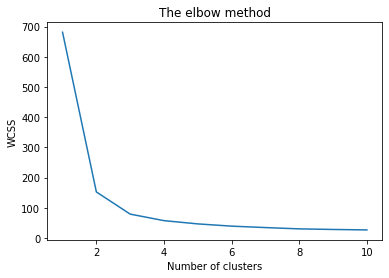

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

No. of optimum clusters is such a value where the elbow forms and wcss value thereby remains almost constant from that point

No. of clusters required here = 3

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

In [13]:
y = kmeans.fit_predict(x)

Visualising the data:

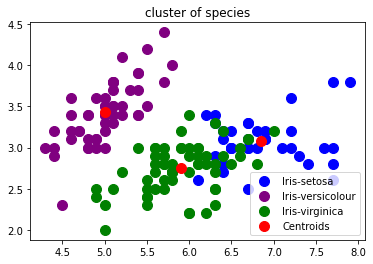

In [30]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


plt.title('cluster of species')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()